In [1]:
from DS_Planck_Unet import *
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
model = unet_planck(input_size=(64, 64, 6), filters=16, blocks=5, output_layers=1)

In [ ]:
model.summary()

In [3]:
batch_size = 20
min_rad = 0.08

In [7]:
val_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', val_pix, 5, 
                   search_nside=256, min_rad=min_rad)
train_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', train_pix, batch_size, 
                    search_nside=256, min_rad=min_rad)

In [16]:
def check_gen(gen, model=None, thr=0.8):
    from matplotlib import pyplot as plt
    pic, mask = next(gen)
    print(pic.shape, mask.shape)
    pic = pic[0]
    mask = mask[0]
    fig, ax = plt.subplots(3, 3, figsize=(12, 12))
    for i in range(3):
        for j in range(2):
            ax[i][j].imshow(pic[:,:,i+3*j])
    ax[0][2].imshow(mask[:,:,0])
    if not (model is None):
        ans = model.predict(np.array([pic]))
        ax[1][2].imshow(ans[0,:,:,0])
        ax[2][2].imshow((ans[0,:,:,0] >= thr).astype(np.float32))

(20, 64, 64, 6) (20, 64, 64, 1)


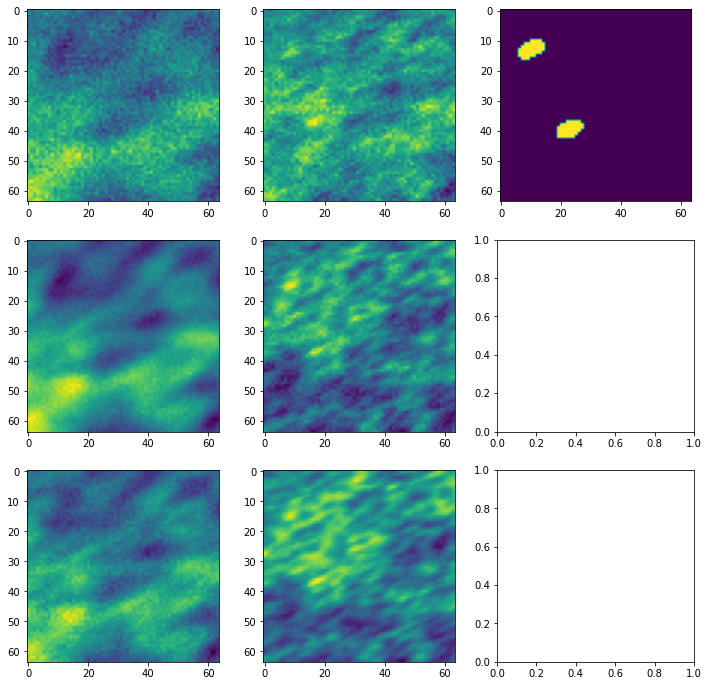

In [6]:
check_gen(train_gen)

In [ ]:
model.fit_generator(generator=train_gen, steps_per_epoch=5, epochs=1, 
                    validation_data=val_gen, validation_steps=1)

In [ ]:
check_gen(val_gen, model)

In [17]:
filepath='/home/rt2122/Models/model.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=True)
callbacks_list = [checkpoint]

In [9]:
model.fit_generator(generator=train_gen, steps_per_epoch=20, epochs=10, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9672 - iou: 0.0139 - dice: 0.0277
Epoch 00001: loss improved from inf to 0.24505, saving model to /home/rt2122/Models/model.01-0.09.h5
20/20 [==============================] - 201s 10s/step - loss: 0.2450 - accuracy: 0.9672 - iou: 0.0139 - dice: 0.0277 - val_loss: 0.0915 - val_accuracy: 0.9907 - val_iou: 0.0072 - val_dice: 0.0144
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.1362 - accuracy: 0.9865 - iou: 0.0240 - dice: 0.0479
Epoch 00002: loss improved from 0.24505 to 0.13618, saving model to /home/rt2122/Models/model.02-0.18.h5
20/20 [==============================] - 151s 8s/step - loss: 0.1362 - accuracy: 0.9865 - iou: 0.0240 - dice: 0.0479 - val_loss: 0.1842 - val_accuracy: 0.9893 - val_iou: 1.1008e-05 - val_dice: 4.5552e-04
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.1

In [10]:
test_gen = gen_data('/home/rt2122/Data/clusters/planck_z.csv', test_pix, 1, 
                    search_nside=256, min_rad=min_rad)

(1, 64, 64, 6) (1, 64, 64, 1)


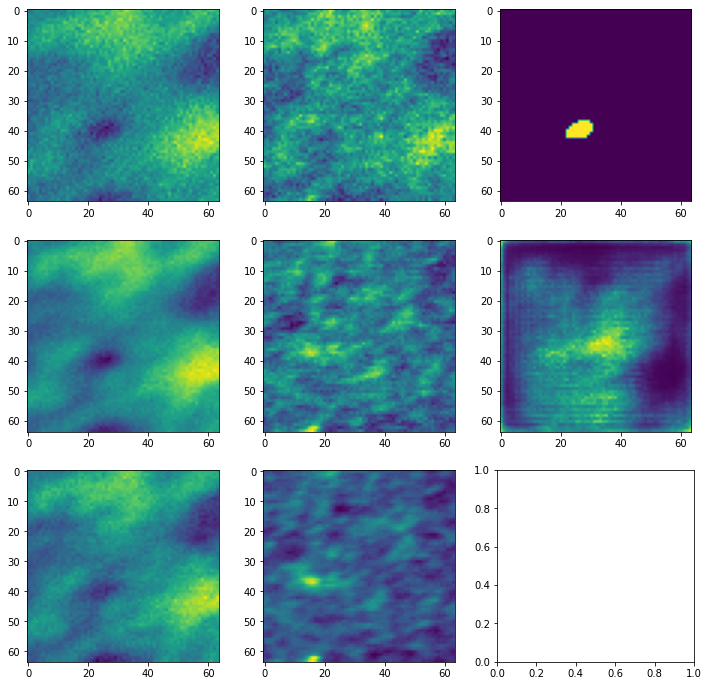

In [11]:
check_gen(test_gen, model)

In [12]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=20, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.0694 - accuracy: 0.9872 - iou: 0.0497 - dice: 0.0995
Epoch 00001: loss did not improve from 0.06788
50/50 [==============================] - 444s 9s/step - loss: 0.0694 - accuracy: 0.9872 - iou: 0.0497 - dice: 0.0995 - val_loss: 0.2132 - val_accuracy: 0.9886 - val_iou: 0.0099 - val_dice: 0.0198
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9874 - iou: 0.0519 - dice: 0.1038
Epoch 00002: loss improved from 0.06788 to 0.06544, saving model to /home/rt2122/Models/model.02-0.18.h5
50/50 [==============================] - 489s 10s/step - loss: 0.0654 - accuracy: 0.9874 - iou: 0.0519 - dice: 0.1038 - val_loss: 0.1796 - val_accuracy: 0.9893 - val_iou: 0.0157 - val_dice: 0.0315
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9875 - iou: 0.0532 - dice: 0.1065
Epoch 00003: loss improved from 0.06544 to 0.06269, saving model to /home/rt2122/Model

(1, 64, 64, 6) (1, 64, 64, 1)


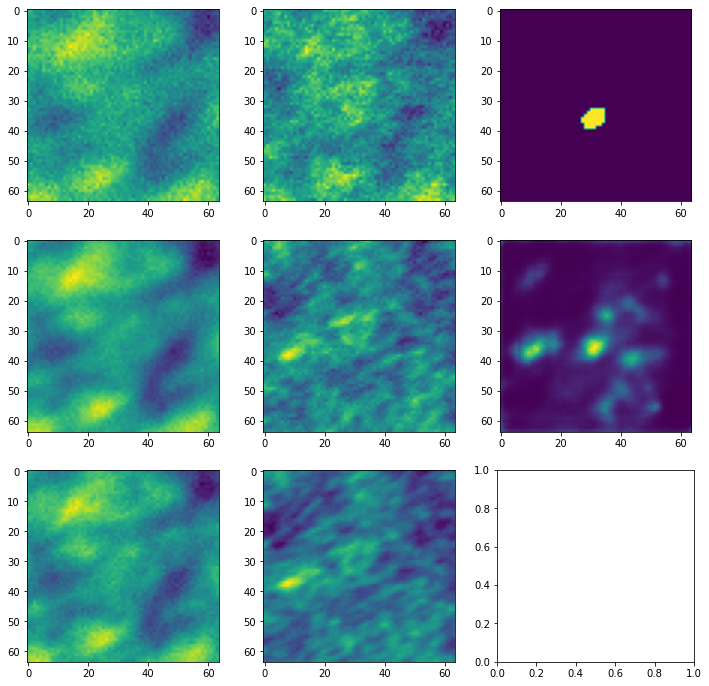

In [13]:
check_gen(test_gen, model)

In [14]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=50, epochs=20, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9897 - iou: 0.1670 - dice: 0.3341
Epoch 00001: loss improved from 0.03402 to 0.03381, saving model to /home/rt2122/Models/model.01-0.27.h5
50/50 [==============================] - 428s 9s/step - loss: 0.0338 - accuracy: 0.9897 - iou: 0.1670 - dice: 0.3341 - val_loss: 0.2687 - val_accuracy: 0.9241 - val_iou: 0.0246 - val_dice: 0.0492
Epoch 2/20
50/50 [==============================] - ETA: 0s - loss: 0.0339 - accuracy: 0.9901 - iou: 0.1667 - dice: 0.3334
Epoch 00002: loss did not improve from 0.03381
50/50 [==============================] - 440s 9s/step - loss: 0.0339 - accuracy: 0.9901 - iou: 0.1667 - dice: 0.3334 - val_loss: 0.1735 - val_accuracy: 0.9484 - val_iou: 0.0332 - val_dice: 0.0665
Epoch 3/20
50/50 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9905 - iou: 0.1975 - dice: 0.3950
Epoch 00003: loss improved from 0.03381 to 0.02946, saving model to /home/rt2122/Models

KeyboardInterrupt: 

(1, 64, 64, 6) (1, 64, 64, 1)


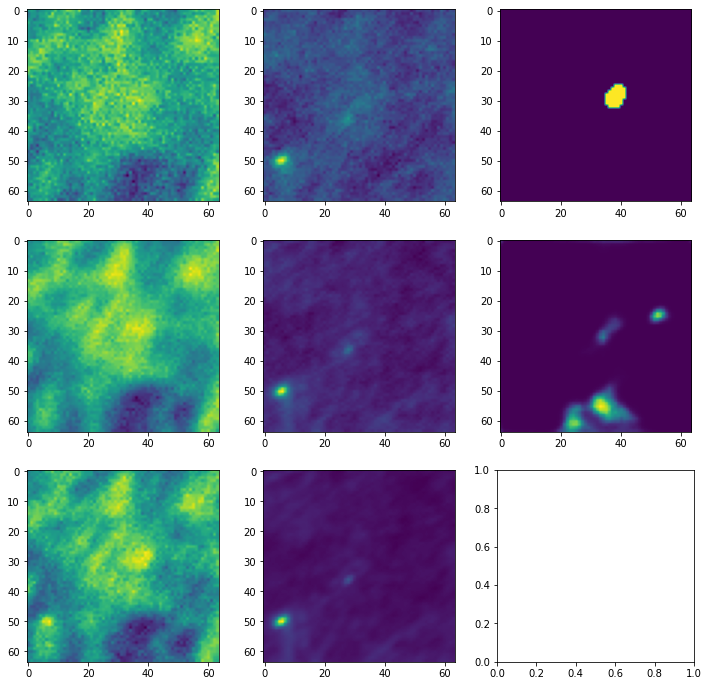

In [15]:
check_gen(test_gen, model)

In [18]:
history = model.fit_generator(generator=train_gen, steps_per_epoch=10, epochs=1, 
                    validation_data=val_gen, validation_steps=1, 
                    callbacks=callbacks_list)

10/10 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9945 - iou: 0.4796 - dice: 0.9592
Epoch 00001: val_loss improved from inf to 0.10363, saving model to /home/rt2122/Models/model.01-0.10.h5
10/10 [==============================] - 75s 7s/step - loss: 0.0136 - accuracy: 0.9945 - iou: 0.4796 - dice: 0.9592 - val_loss: 0.1036 - val_accuracy: 0.9622 - val_iou: 0.0680 - val_dice: 0.1361
